In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('fashion-mnist_train.csv', sep = ',')
df_test = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
training = np.array(df_train, dtype = 'float32')
test = np.array(df_test, dtype = 'float32')

9.0

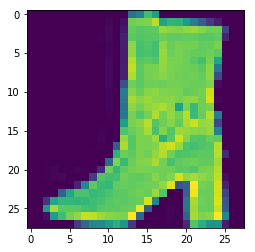

In [25]:
import random
i = random.randint(1,60000)
plt.imshow(training[i , 1:].reshape(28 , 28))
label = training[i, 0]
label

In [15]:
df_train.shape

(60000, 785)

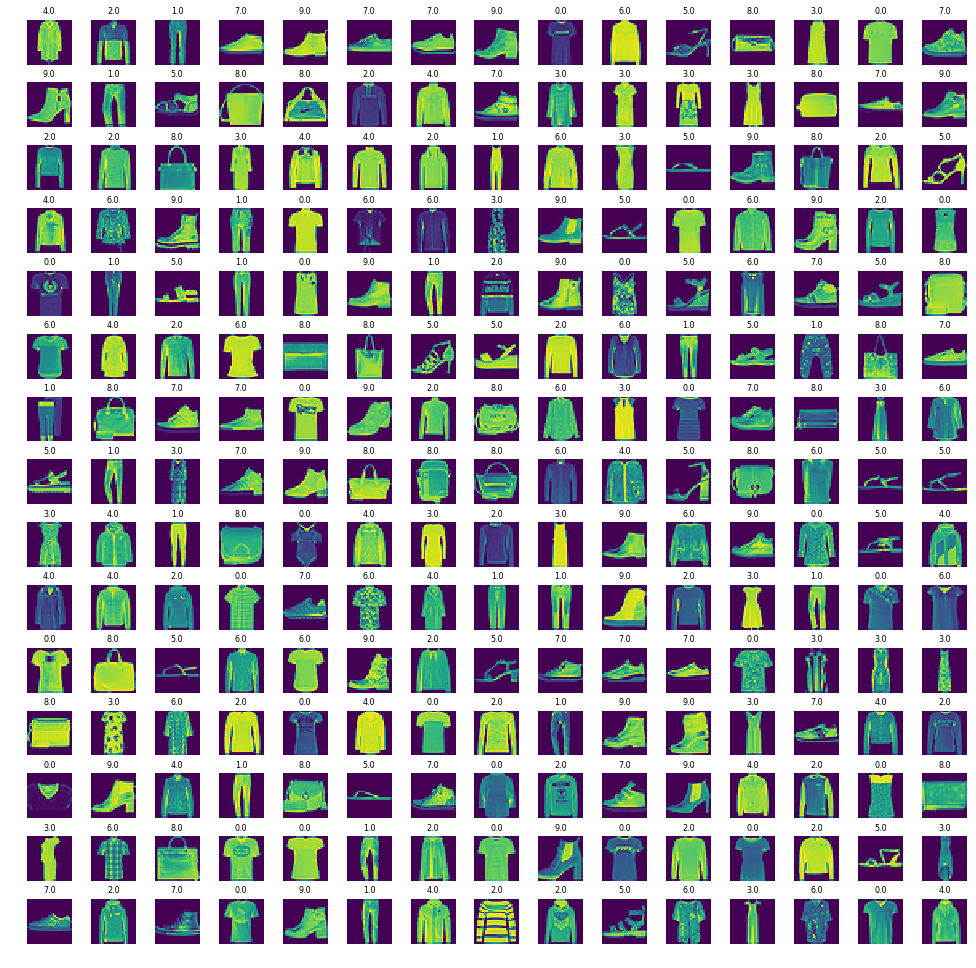

In [26]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

## traininig the model

In [27]:
X_train = training[: , 1:]/255
y_train = training[:, 0]

In [28]:
X_test = test[:, 1:]/255
y_test = test[:, 0]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [31]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [32]:
import keras

Using TensorFlow backend.


In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [34]:
cnn_model = Sequential()

In [35]:
cnn_model.add(Conv2D(32,3,2, input_shape = (28, 28, 1),activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Acer\Anaconda3\envs\hello-tf\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 2), input_shape=(28, 28, 1..., activation="relu")`
  if __name__ == '__main__':


In [36]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [37]:
cnn_model.add(Flatten())

In [38]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

C:\Users\Acer\Anaconda3\envs\hello-tf\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  if __name__ == '__main__':


In [39]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\Acer\Anaconda3\envs\hello-tf\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  if __name__ == '__main__':


In [40]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr = 0.001), metrics=['accuracy'])

In [41]:
epochs = 50

In [42]:
cnn_model.fit(X_train, y_train,
             batch_size=512,
             epochs = epochs,
             verbose=1,
             validation_data= (X_validate, y_validate))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 12s 260us/step - loss: 0.8834 - acc: 0.6990 - val_loss: 0.5098 - val_acc: 0.8175
Epoch 2/50
48000/48000 [==============================] - 11s 239us/step - loss: 0.4713 - acc: 0.8345 - val_loss: 0.4335 - val_acc: 0.8467
Epoch 3/50
48000/48000 [==============================] - 12s 241us/step - loss: 0.4082 - acc: 0.8575 - val_loss: 0.3900 - val_acc: 0.8636
Epoch 4/50
48000/48000 [==============================] - 12s 242us/step - loss: 0.3795 - acc: 0.8673 - val_loss: 0.3751 - val_acc: 0.8710
Epoch 5/50
48000/48000 [==============================] - 12s 241us/step - loss: 0.3539 - acc: 0.8767 - val_loss: 0.3441 - val_acc: 0.8791
Epoch 6/50
48000/48000 [==============================] - 12s 242us/step - loss: 0.3371 - acc: 0.8820 - val_loss: 0.3382 - val_acc: 0.8822
Epoch 7/50
48000/48000 [==============================] - 12s 242us/

## Evaluatting the model

In [43]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 78us/step
Test Accuracy : 0.911600


In [44]:
predicted_classes = cnn_model.predict_classes(X_test)

In [45]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

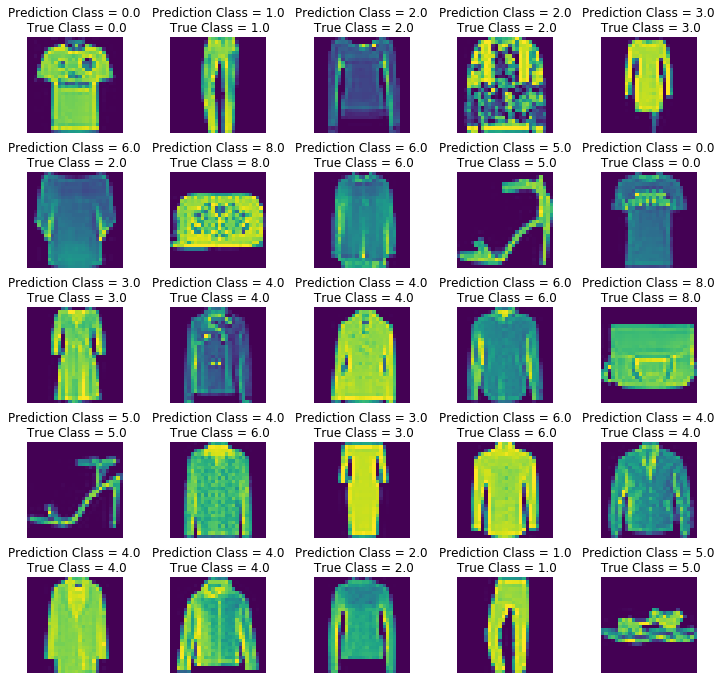

In [46]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


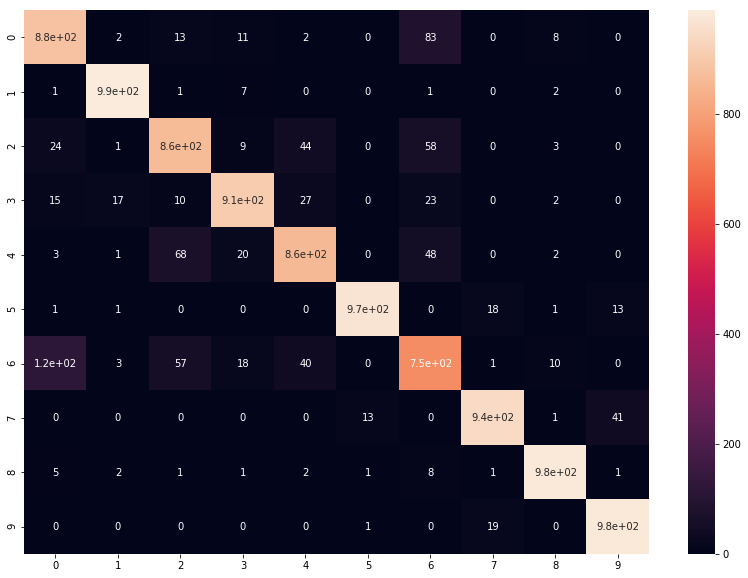

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [48]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.88      0.86      1000
     Class 1       0.97      0.99      0.98      1000
     Class 2       0.85      0.86      0.86      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.88      0.86      0.87      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.77      0.75      0.76      1000
     Class 7       0.96      0.94      0.95      1000
     Class 8       0.97      0.98      0.97      1000
     Class 9       0.95      0.98      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

